# Styles

Multiplex comes with multiple styles to quickly customize the look and feel of your visualizations. This notebook is a quick reference to help you see how the different styles look with different visualizations.

Each style has one primary color `C0`, a highlight color `C1` and a background color `C2`.

In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import matplotlib.pyplot as plt
import networkx as nx
import nltk
import numpy as np
import os
import sys

path = sys.path[0]
path = os.path.join(path, "..")
if path not in sys.path:
    sys.path.insert(1, path)

from multiplex import drawable
drawable = importlib.reload(drawable)

In [6]:
def draw_timeseries(viz):
    """
    Draw a timeseries on the provided visualization.
    
    :param viz: The visualization where the timeseries will be drawn.
    :type viz: :class:`multiple.drawable.Drawable`
    """
    
    viz.set_xlim(-0.5, 10.5)
    viz.set_ylim(0.2, 0.8)
    viz.set_xlabel('Time')
    viz.set_ylabel('Value')

    for i, label in zip(range(2), [ 'A', 'B' ]):
        np.random.seed(i)
        x = range(11)
        y = np.linspace(0.4, 0.7 - 0.15 * i, num=11) + np.random.normal(0, 0.03, 11)
        viz.draw_time_series(x, y,
                             color=('C0' if i == 1 else 'C1'), label=label, with_legend=True)
    
    viz.set_title('Time series', loc='left')
    viz.set_caption('A simple time series.')

def draw_text(viz, dark=False):
    """
    Draw annotated text on the provided visualization.
    
    :param viz: The visualization where the text annotation will be drawn.
    :type viz: :class:`multiple.drawable.Drawable`
    :param dark: A boolean indicating whether the theme is dark or not.
                 This influences the highlight color.
    :type dark: boolean
    """
    
    paragraph = "Anthony Lopes is a Portuguese professional footballer who plays for \
Olympique Lyonnais as a goalkeeper. He came through the youth ranks at Lyon, being \
called to the first team in 2011 and making his debut the following year. \
He made over 300 appearances for the club, including the 2014 Coupe de la Ligue Final. \
Born in France, Lopes represented Portugal internationally, \
totalling 36 caps at youth level including 11 for the under-21 team. \
He made his senior debut for the country in March 2015, \
and was chosen for Euro 2016 and the 2018 World Cup."
    tokens = nltk.word_tokenize(paragraph)
    pos_tags = nltk.pos_tag(tokens)
    chunks = [ entity for entity in nltk.ne_chunk(pos_tags, binary=True) ]

    tokens = []
    for chunk in chunks:
        if type(chunk) == nltk.tree.Tree:
            for entity_chunk in chunk:
                entity, _ = entity_chunk
                tokens.append({
                    'style': {
                        'facecolor': 'C1',
                        'color': 'C0' if dark else 'C2',
                    },
                    'text': entity
                })
        else:
            token, _ = chunk
            tokens.append(token)

    viz.draw_text_annotation(tokens, align='justify', alpha=0.8, fontfamily='serif', lpad=0.05, rpad=0.05, tpad=0.1)
    viz.axis.set_ylim(-0.55, 0.05)
    viz.set_title('Text annotation', loc='left')
    viz.set_caption('A simple text annotation visualization.')

def draw_graph(viz):
    """
    Draw a network graph on the given visualization.
    
    :param viz: The visualization where the text annotation will be drawn.
    :type viz: :class:`multiple.drawable.Drawable`
    """
    
    E = [ ('A', 'A'), ('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A') ]
    G = nx.from_edgelist(E, nx.DiGraph)
    G.edges[('A', 'A')]['name'] = 'A-A'
    G.edges[('A', 'B')]['name'] = 'A-B'
    G.edges[('B', 'C')]['name'] = 'B-C'
    G.edges[('C', 'D')]['name'] = 'C-D'
    G.edges[('D', 'A')]['name'] = 'D-A'
    G.nodes['B']['style'] = { 'edgecolor': 'C1', 'linewidth': 5, 's': 2000 }
#     G = nx.path_graph(10, nx.DiGraph)
    node_style = { 's': 1000, 'color': 'C0', 'alpha': 1 }
    edge_style = { 'color': 'C0', 'linewidth': 2.5,
                   'headwidth': 15, 'headlength': 15 }
    name_style = { 'facecolor': 'C2', 'color': 'C0', 'fontweight': 900 }
    viz.draw_graph(G, node_style=node_style, edge_style=edge_style,
                   name_style=name_style, seed=24)
    xlim, ylim = viz.axis.get_xlim(), viz.axis.get_ylim()
    expand = 1.25
    viz.set_xlim((xlim[0] * expand, xlim[1] * expand))
    viz.set_ylim((ylim[0] * expand, ylim[1] * expand))
    viz.set_title('Network graph', loc='left')
    viz.set_caption('A simple network graph visualization.')

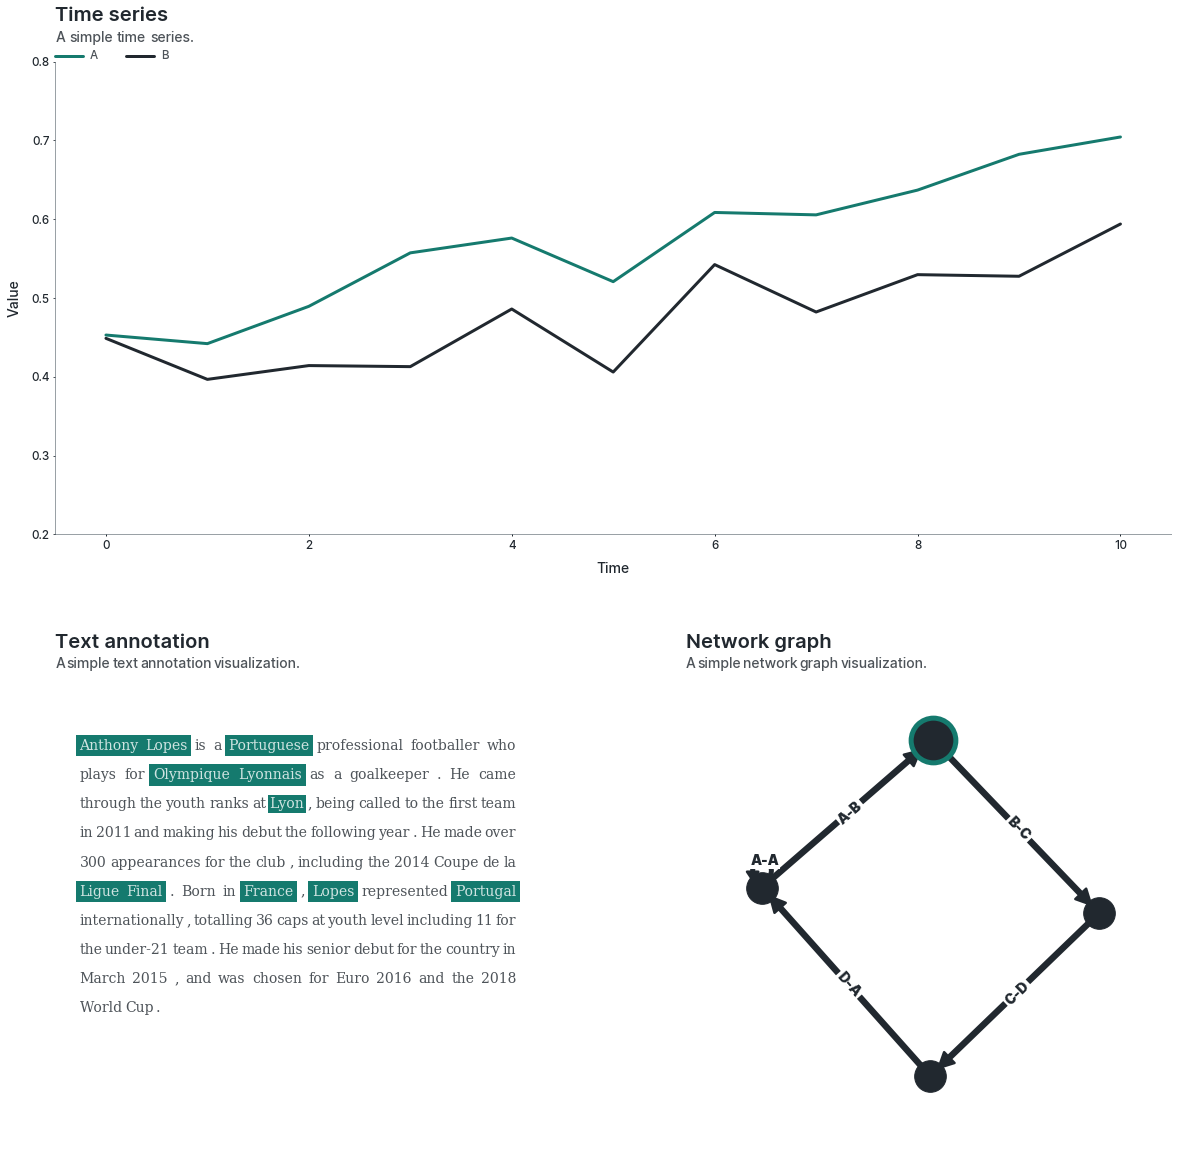

In [36]:
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "multiplex.style"))
drawable = importlib.reload(drawable)

figure = plt.figure(figsize=(20, 20))
gs = figure.add_gridspec(2, 2)
draw_timeseries(drawable.Drawable(figure, figure.add_subplot(gs[0, :])))
draw_text(drawable.Drawable(figure, figure.add_subplot(gs[1, 0])))
draw_graph(drawable.Drawable(figure, figure.add_subplot(gs[1, 1])))
plt.show()

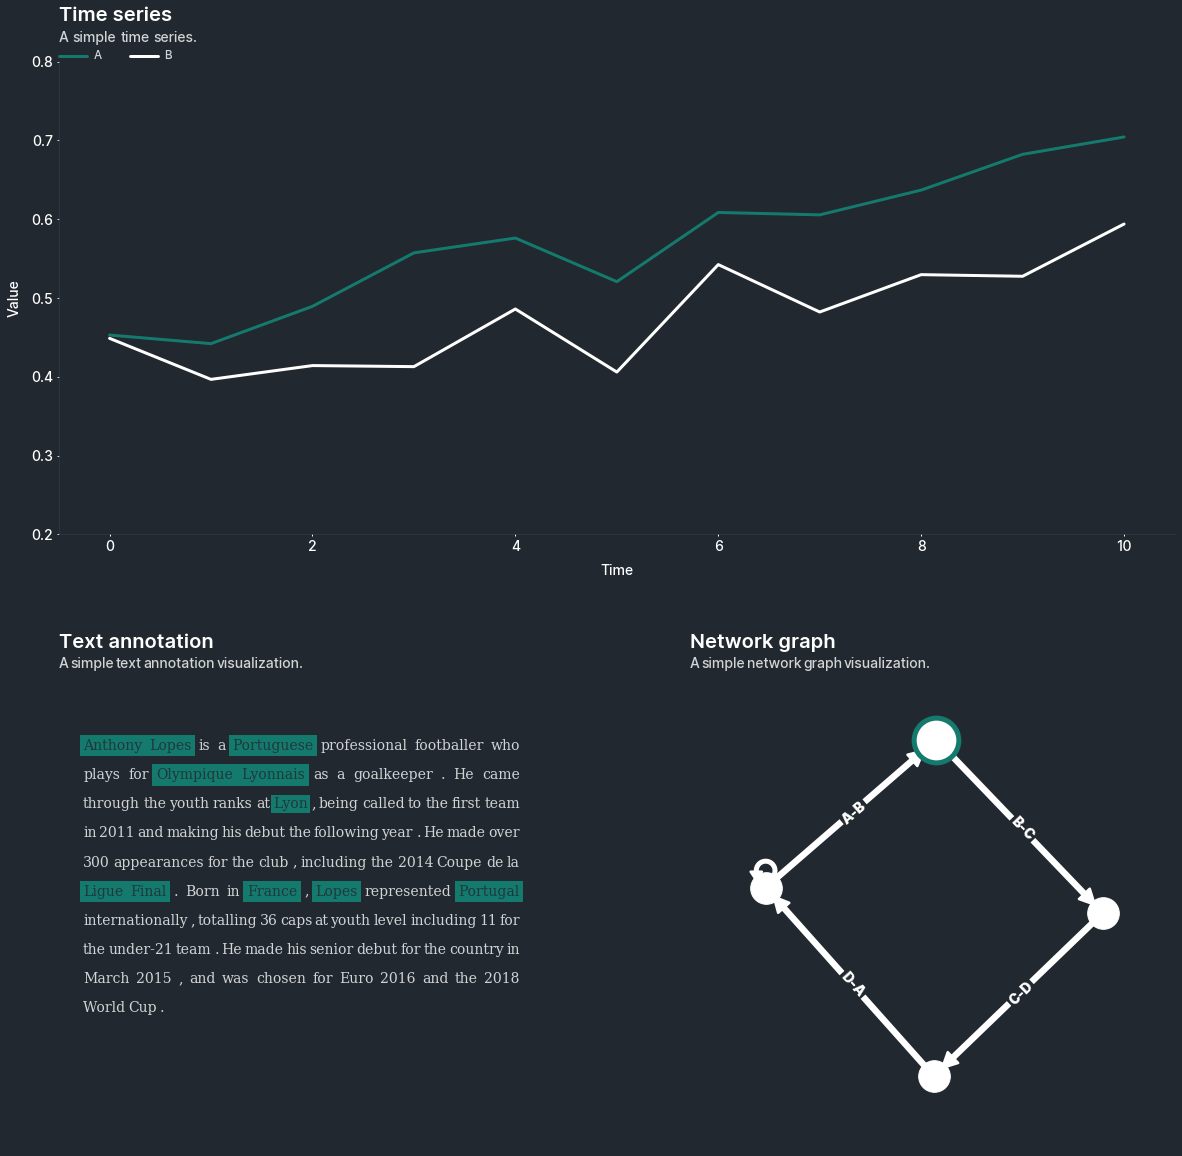

In [4]:
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "multiplex-dark.style"))
drawable = importlib.reload(drawable)

figure = plt.figure(figsize=(20, 20))
gs = figure.add_gridspec(2, 2)
draw_timeseries(drawable.Drawable(figure, figure.add_subplot(gs[0, :])))
draw_text(drawable.Drawable(figure, figure.add_subplot(gs[1, 0])))
draw_graph(drawable.Drawable(figure, figure.add_subplot(gs[1, 1])))
plt.show()

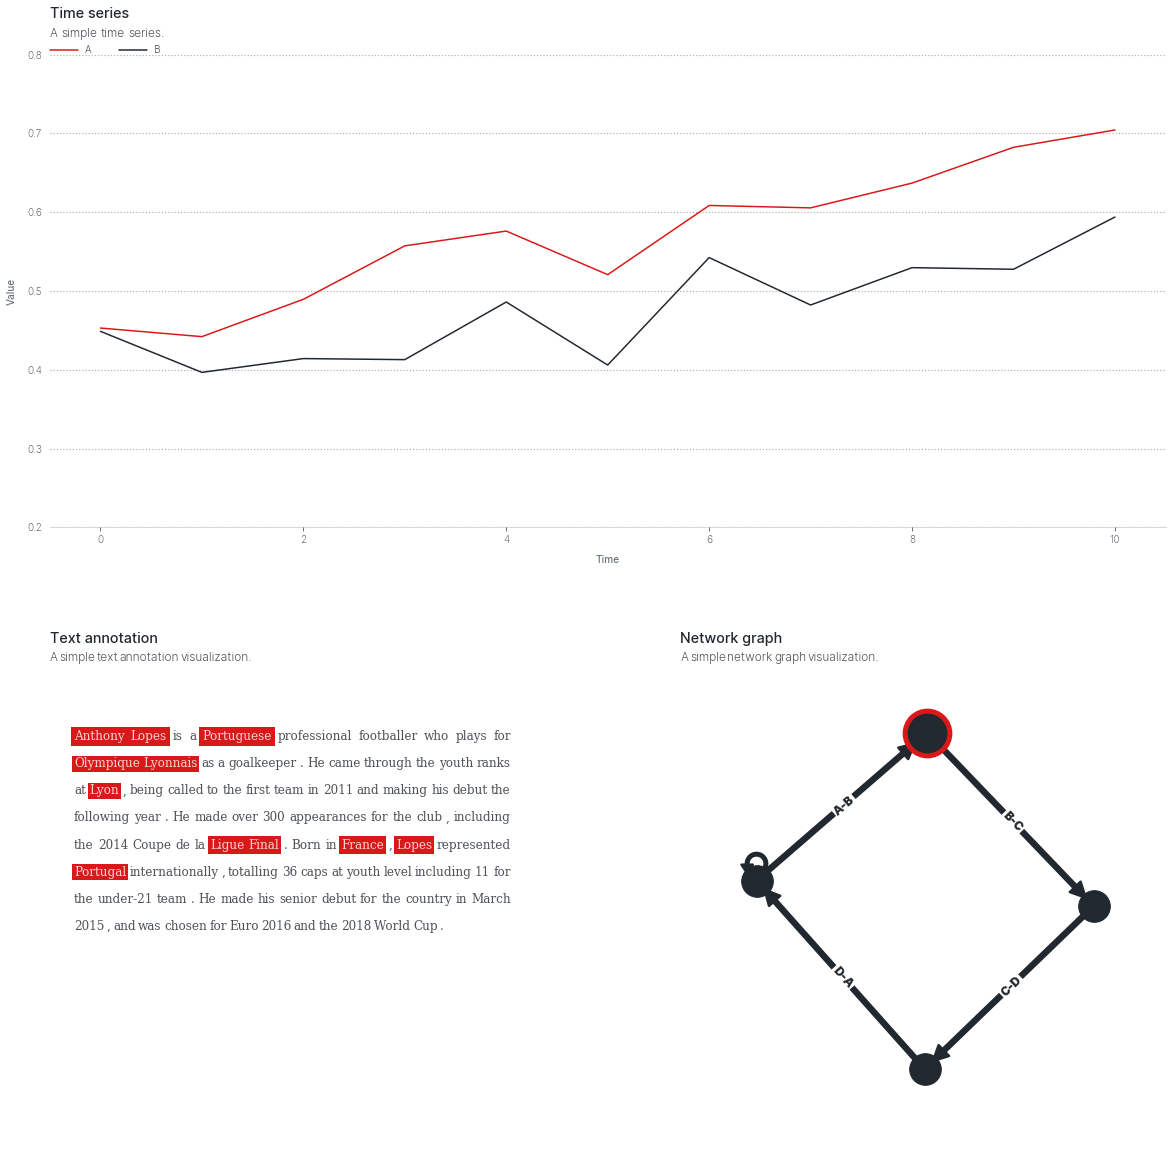

In [5]:
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "modern.style"))
drawable = importlib.reload(drawable)

figure = plt.figure(figsize=(20, 20))
gs = figure.add_gridspec(2, 2)
draw_timeseries(drawable.Drawable(figure, figure.add_subplot(gs[0, :])))
draw_text(drawable.Drawable(figure, figure.add_subplot(gs[1, 0])))
draw_graph(drawable.Drawable(figure, figure.add_subplot(gs[1, 1])))
plt.show()

You can start learning about how to use Multiplex in the [first tutorial](https://github.com/NicholasMamo/multiplex-plot/blob/master/examples/1.%20Getting%20started.ipynb).